# Assignment 1: Descriptive Statistics and Probability Theory

**submitted by Sreekanth Potlabathini(220088993)**

-------------------------------------------------------------------

**Content** 

step 1: Importing libraries & data set 

step 2: Working with the data

step 3: Understand outliers and see if they can be removed

step 4: Removing duplicates & non-useful data 

step 5: Complete the data- fill missing values

step 6: Questions & Answers + Data Analysis results

-------------------------------------------------------------------

step 1: Importing libraries & data set

In [534]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset 'sales.csv file for the analysis
df = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\Assignment 1\sales_data.csv')


step 2: Working with the data

In [535]:

# Data is import.
# Understanding the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


we can see that the total data is around 1050 in Sate date but every other value is missing few details.

From the above, we can see for the 'units sold' the mean and 50% are very near. Hence it is normally distributed and we can use the data for further analysis.

We have filled the missing values in product & Region.
for filling price and Units sold we can use mean value or null value based on the distribution. 

we can add a mean value of price and sales for missing values in out dataframe but that would cause issue when we run analysis based on Product or region

hence, the missing  values of price and sales needs to be '0' and we can look for more info to remove them if they become the outliers.


In [536]:
# renaming Units for easy typing
df=df.rename(columns={'Units Sold':'Units'})
df=df.rename(columns={'Sale Date':'Date'})
df.describe(include='all')

,Product,Region,Price,Units,Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


we have 51 unique products as per the info above and 11 Regions

plotting graphs based the info presented can help us identify the outlier and remove them

we need to clean the data for removing outliers for analysis the sales

step 3: Complete the data- fill missing values

 Removing duplicates & fill missing values

In [537]:
# removing the duplicates
df.drop_duplicates(inplace=True)

In [538]:
# filling in the missing values in Product and Region with 'Others'
df['Product']=df['Product'].fillna('Other')
df['Region']=df['Region'].fillna('Other')

step 3: Understand outliers and see if they can be removed

<!-- looking at the above graph it isbetter to remove missing values to make it more normally distributed. chances of missing-out on usefull information if all are removed hence we use a copy function to a different dataset to protect information. -->

<Axes: xlabel='Units', ylabel='Price'>

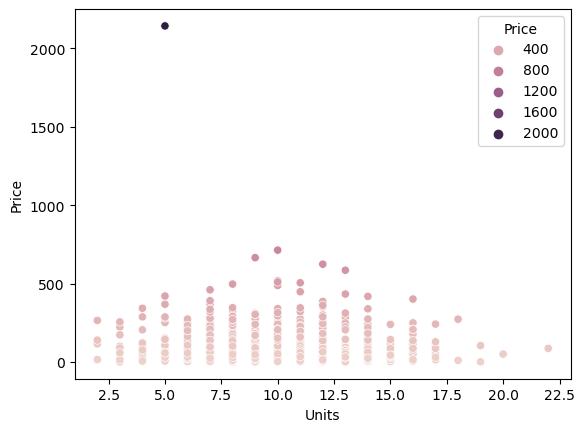

In [539]:
sns.scatterplot(data=df,x='Units',y='Price',hue='Price')

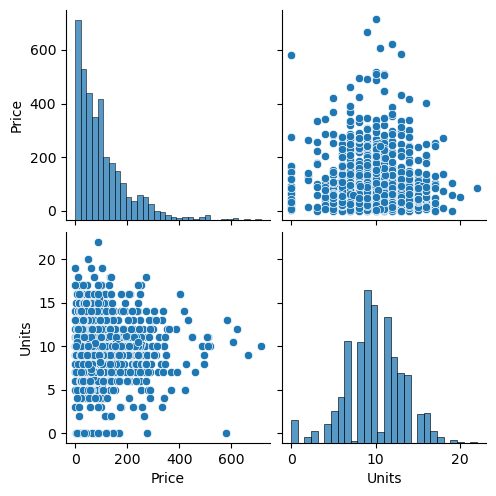

In [540]:

# removing outlier which is too high of a vlue Units sold and could  be a entry error.
# fromt he aove graph we can see that there is one outlier whose price is greater than 2000
df.drop(df[df['Price']>2000].index,axis=0,inplace=True)



# DFwill be iuputted with mean value is identifed as the best data cleaning process
mean_prices = df.groupby(['Product', 'Region'])['Price'].mean()
mean_units = df.groupby(['Product', 'Region'])['Units'].mean()

df['Price'].fillna(df.groupby(['Product', 'Region'])['Price'].transform('mean'), inplace=True)
df['Units'].fillna(df.groupby(['Product', 'Region'])['Units'].transform('mean'), inplace=True)

df['Price']=df['Price'].fillna(0)
df['Units']=df['Units'].fillna(0)


sns.pairplot(data=df)

out of the both df2 looks much better with more information and the graph is nort very distorted so can be used.

In [541]:
df.describe(include='all')

,Product,Region,Price,Units,Date
count,999,999,999.000000,999.000000,999
unique,51,11,NaN,NaN,999
top,Other,Region_9,NaN,NaN,2022-01-01
freq,100,104,NaN,NaN,1
mean,NaN,NaN,104.086688,9.827923,NaN
std,NaN,NaN,103.353543,3.385938,NaN
min,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,29.245000,8.000000,NaN
50%,NaN,NaN,77.820000,10.000000,NaN
75%,NaN,NaN,139.555000,12.000000,NaN


In [542]:
# the data looks complete 
# staring the analysis to get information
# creating a new column for income earned from selling the product
# Price x Units = sales
df.reset_index(drop=True, inplace=True)

df['sales'] = df['Price']*df['Units']

#converting date to a readable format:
df['Date'] = pd.to_datetime(df['Date'])

<Axes: >

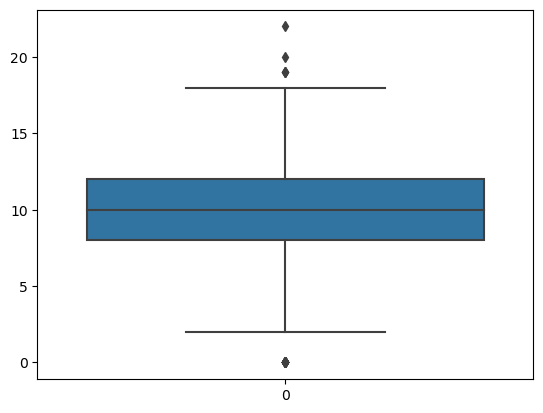

In [543]:
sns.boxplot(df['Units']) 

<Axes: >

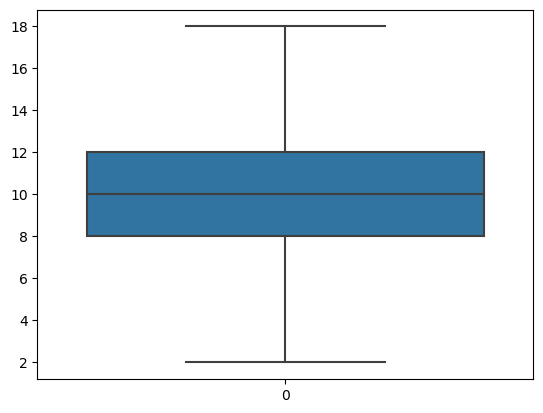

In [544]:
# removing outliers 
df.drop(df[df['Units'] ==0].index,axis=0,inplace=True)
df.drop(df[df['Units'] >=19].index,axis=0,inplace=True)
sns.boxplot(df['Units']) 

<Axes: >

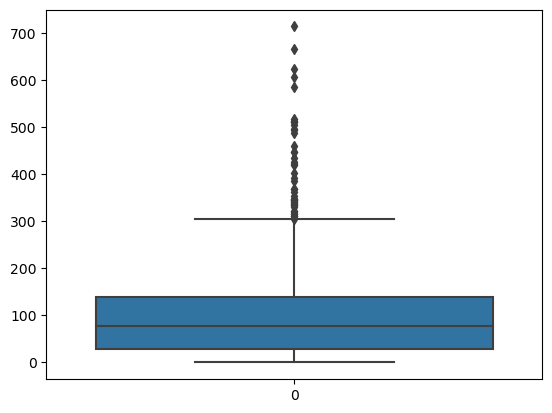

In [545]:
sns.boxplot(df['Price']) 

need to look at other relations to remove price. but for now we can safely consider removing above 550.

<Axes: >

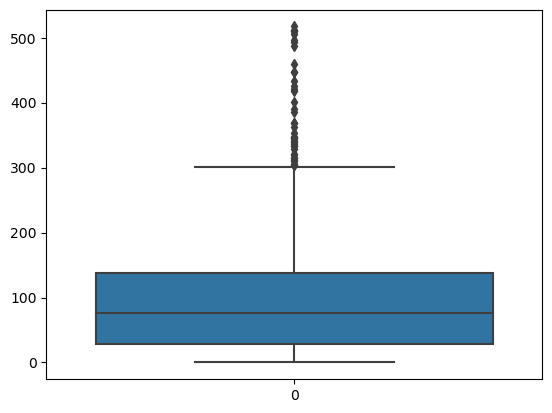

In [546]:
# removing outliers 
df.drop(df[df['Price'] >=550].index,axis=0,inplace=True)
sns.boxplot(df['Price']) 

<Axes: xlabel='Region', ylabel='Units'>

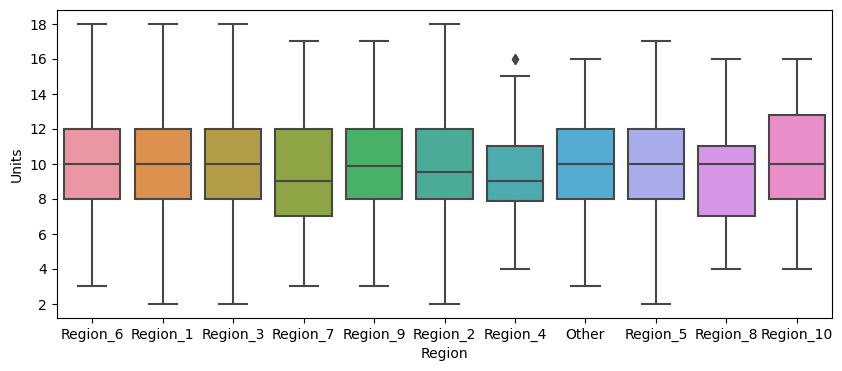

In [547]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='Region',y='Units',data=df,ax=ax)


from the above we can remove the outlier units which is greater than 20 units

<Axes: xlabel='Region', ylabel='Units'>

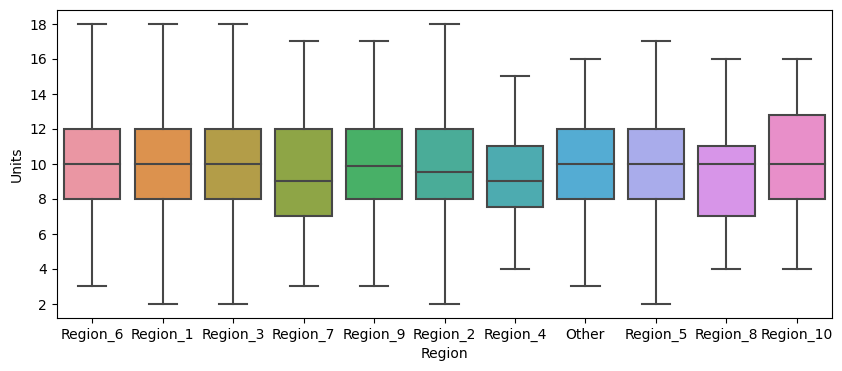

In [548]:
# trimmming the outliers to make better predictions
df.drop(df[(df['Region'] == 'Region_4') & (df['Units'] == df.loc[df['Region'] == 'Region_4', 'Units'].max())].index,axis=0,inplace=True)
# verifing new boxplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='Region',y='Units',data=df,ax=ax)


C:\Users\srika\AppData\Local\Temp\ipykernel_19028\976171415.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Product', ylabel='Units'>

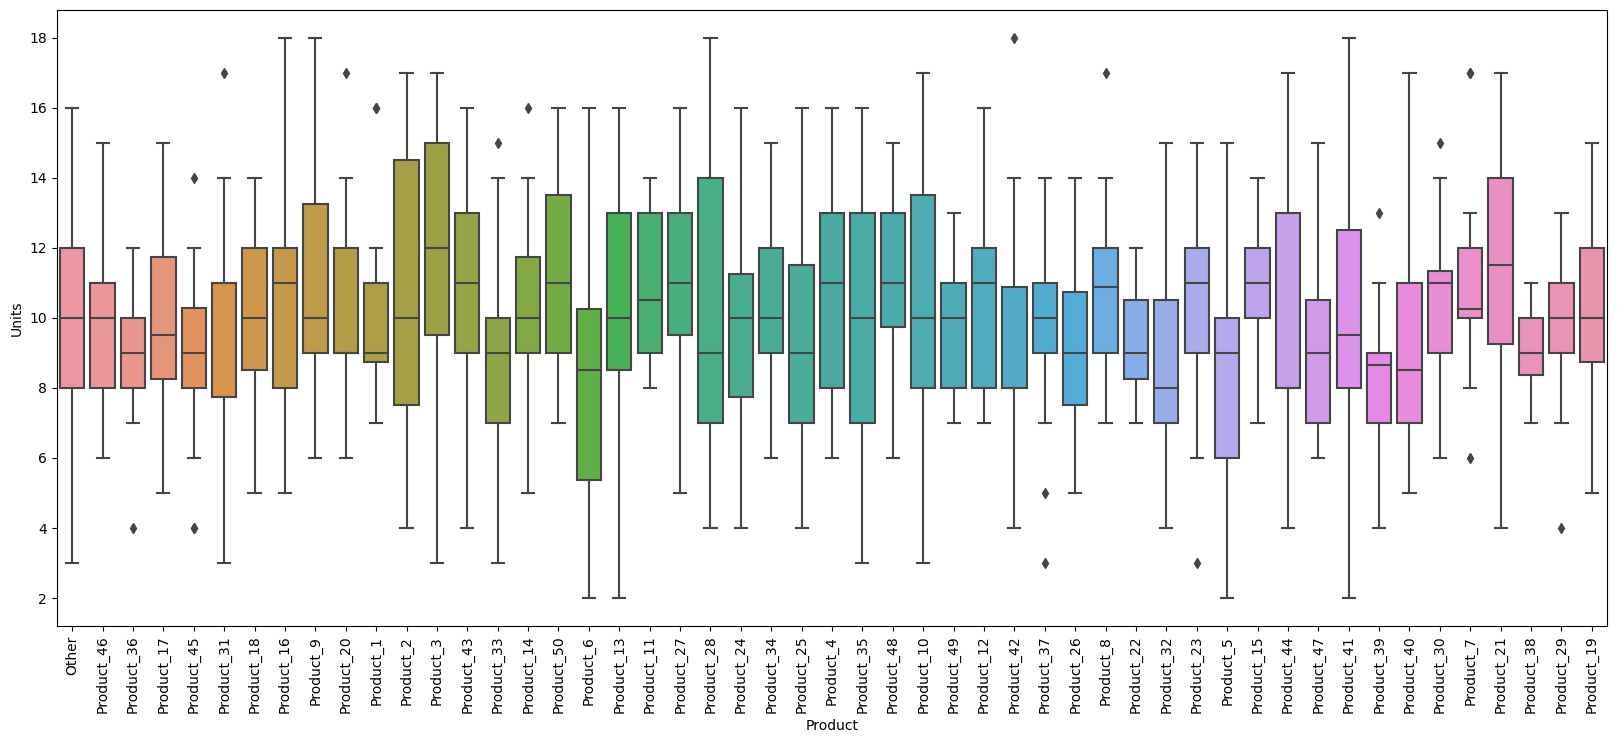

In [549]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Product',y='Units',data=df,ax=ax)


C:\Users\srika\AppData\Local\Temp\ipykernel_19028\3888107792.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Product', ylabel='Units'>

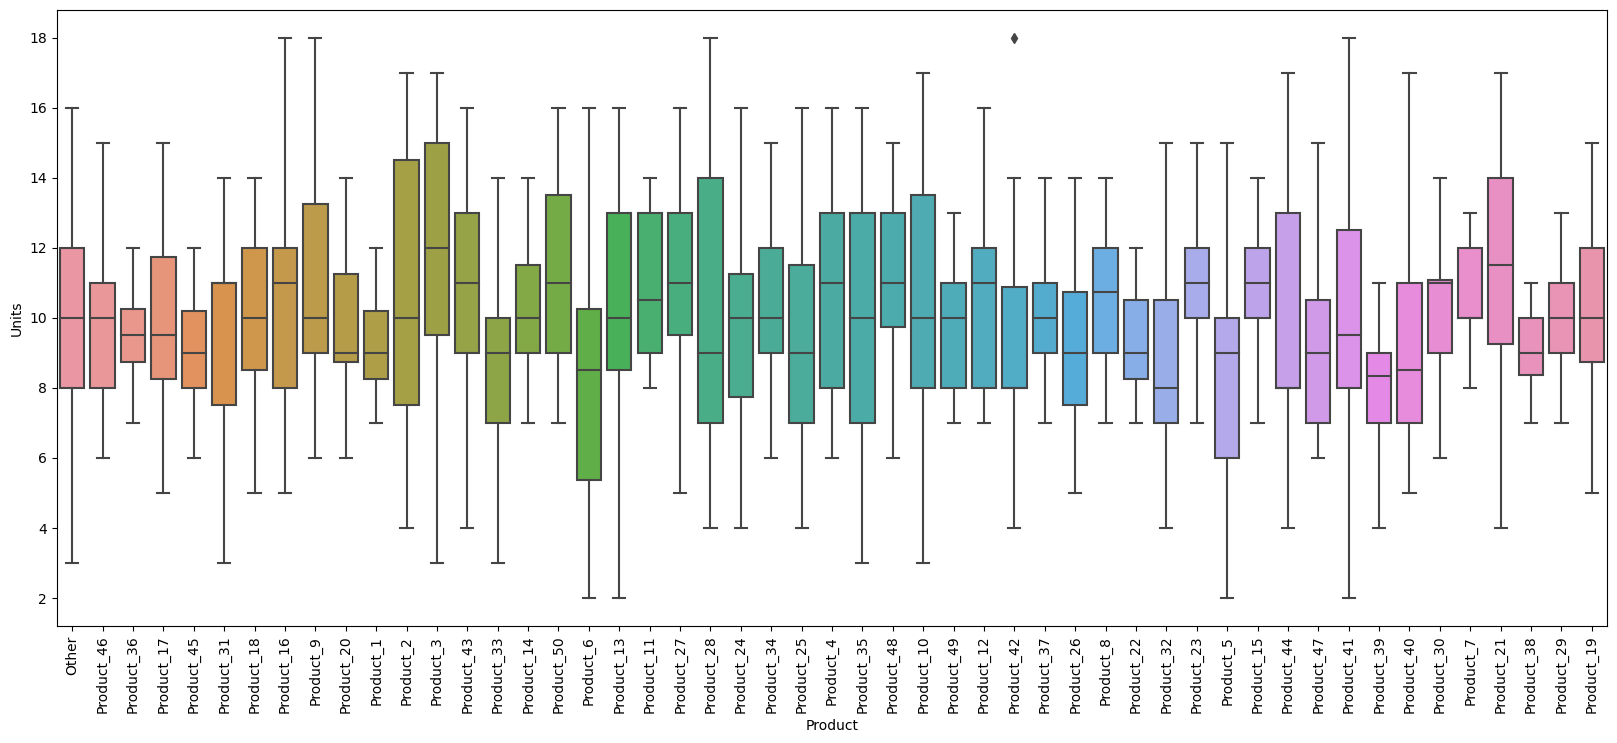

In [550]:
# trimmming the outliers to make better predictions
df.drop(df[(df['Product'] == 'Product_36') & (df['Units'] == df.loc[df['Product'] == 'Product_36', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_45') & (df['Units'] == df.loc[df['Product'] == 'Product_45', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_45') & (df['Units'] == df.loc[df['Product'] == 'Product_45', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_20') & (df['Units'] == df.loc[df['Product'] == 'Product_20', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_33') & (df['Units'] == df.loc[df['Product'] == 'Product_33', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_14') & (df['Units'] == df.loc[df['Product'] == 'Product_14', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_14') & (df['Units'] == df.loc[df['Product'] == 'Product_14', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_1') & (df['Units'] == df.loc[df['Product'] == 'Product_1', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_8') & (df['Units'] == df.loc[df['Product'] == 'Product_8', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_37') & (df['Units'] == df.loc[df['Product'] == 'Product_37', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_37') & (df['Units'] == df.loc[df['Product'] == 'Product_37', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_23') & (df['Units'] == df.loc[df['Product'] == 'Product_23', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_23') & (df['Units'] == df.loc[df['Product'] == 'Product_23', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_39') & (df['Units'] == df.loc[df['Product'] == 'Product_39', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_30') & (df['Units'] == df.loc[df['Product'] == 'Product_30', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_7') & (df['Units'] == df.loc[df['Product'] == 'Product_7', 'Units'].max())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_7') & (df['Units'] == df.loc[df['Product'] == 'Product_7', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_29') & (df['Units'] == df.loc[df['Product'] == 'Product_29', 'Units'].min())].index,axis=0,inplace=True)
df.drop(df[(df['Product'] == 'Product_31') & (df['Units'] == df.loc[df['Product'] == 'Product_31', 'Units'].max())].index,axis=0,inplace=True)

# verifing new boxplot
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Product',y='Units',data=df,ax=ax)


In [551]:
df.describe(include='all')

C:\Users\srika\AppData\Local\Temp\ipykernel_19028\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Product,Region,Price,Units,Date,sales
count,943,943,943.000000,943.000000,943,943.000000
unique,51,11,NaN,NaN,943,NaN
top,Other,Region_10,NaN,NaN,2022-01-01 00:00:00,NaN
freq,100,101,NaN,NaN,1,NaN
first,NaN,NaN,NaN,NaN,2022-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2024-09-26 00:00:00,NaN
mean,NaN,NaN,101.224769,9.961394,NaN,996.940089
std,NaN,NaN,96.160030,2.917764,NaN,1011.745049
min,NaN,NaN,0.000000,2.000000,NaN,0.000000
25%,NaN,NaN,28.545000,8.000000,NaN,260.030000


<Axes: xlabel='Region', ylabel='Price'>

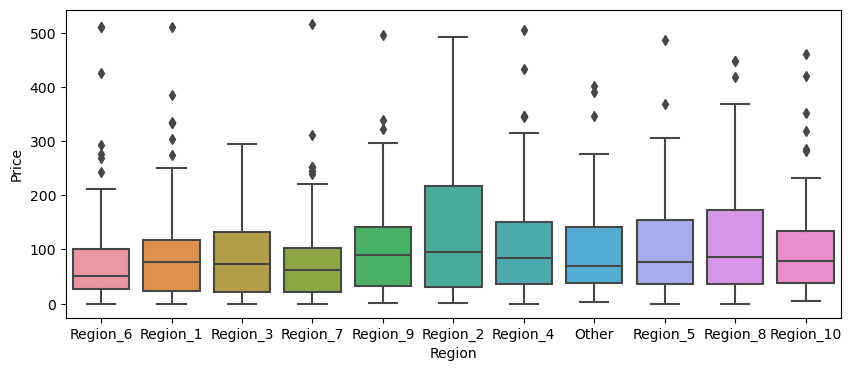

In [552]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='Region',y='Price',data=df,ax=ax)

Removing Price greater than 350 to improve data

<Axes: xlabel='Region', ylabel='Price'>

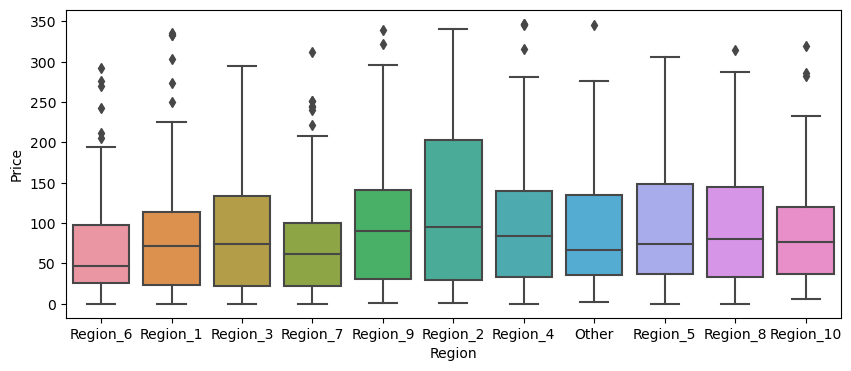

In [553]:
df.drop(df[df['Price']>=350].index,axis=0,inplace=True)

# verifing new boxplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='Region',y='Price',data=df,ax=ax)

C:\Users\srika\AppData\Local\Temp\ipykernel_19028\158997619.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<Axes: xlabel='Product', ylabel='Price'>

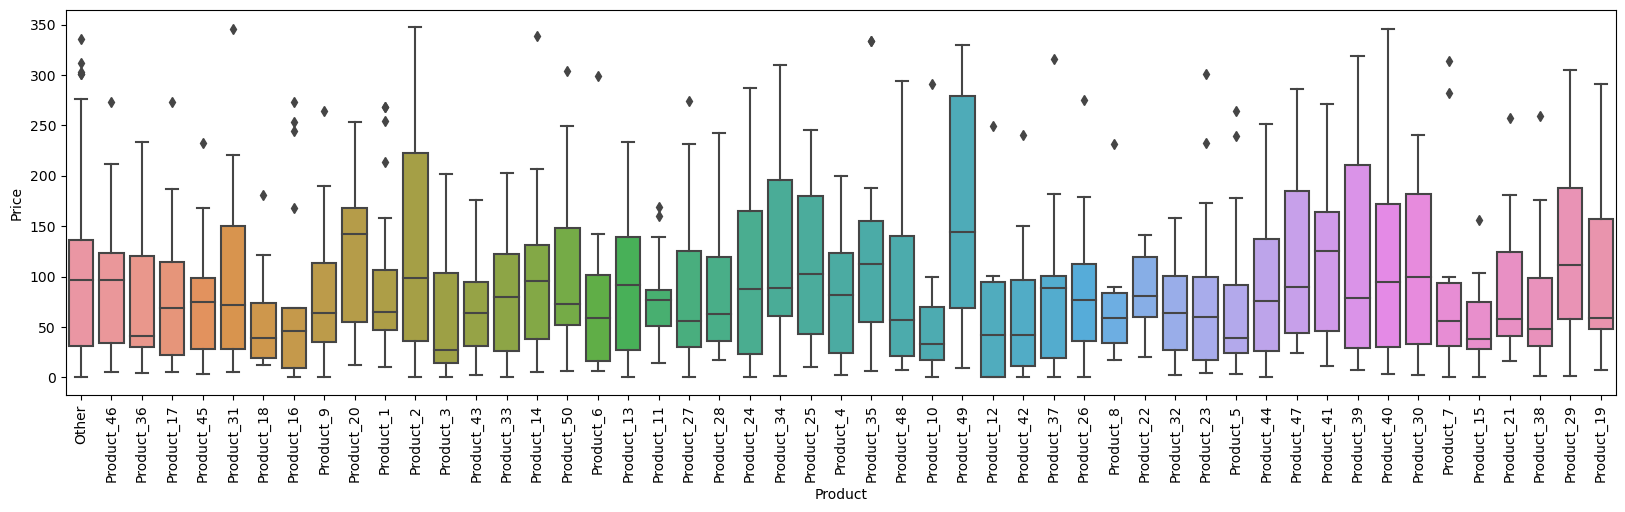

In [554]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.boxplot(x='Product',y='Price',data=df,ax=ax)

In [555]:
# trimmming the outliers to make better predictions
df.drop(df[(df['Product'] == 'Product_2') & (df['Price'] == df.loc[df['Product'] == 'Product_2', 'Price'].max())].index,axis=0,inplace=True)

step 4: Removing duplicates

In [556]:
# removing the duplicates
df.drop_duplicates(inplace=True)

In [557]:
df.describe(include='all')

C:\Users\srika\AppData\Local\Temp\ipykernel_19028\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Product,Region,Price,Units,Date,sales
count,919,919,919.000000,919.000000,919,919.000000
unique,51,11,NaN,NaN,919,NaN
top,Other,Region_10,NaN,NaN,2022-01-01 00:00:00,NaN
freq,99,98,NaN,NaN,1,NaN
first,NaN,NaN,NaN,NaN,2022-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2024-09-26 00:00:00,NaN
mean,NaN,NaN,92.541347,9.963651,NaN,910.949014
std,NaN,NaN,80.206671,2.925130,NaN,848.449497
min,NaN,NaN,0.000000,2.000000,NaN,0.000000
25%,NaN,NaN,27.900000,8.000000,NaN,255.065000


In [558]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Product  919 non-null    object        
 1   Region   919 non-null    object        
 2   Price    919 non-null    float64       
 3   Units    919 non-null    float64       
 4   Date     919 non-null    datetime64[ns]
 5   sales    919 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 43.2+ KB


Step 6: data analysis

C:\Users\srika\AppData\Local\Temp\ipykernel_19028\4080238823.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


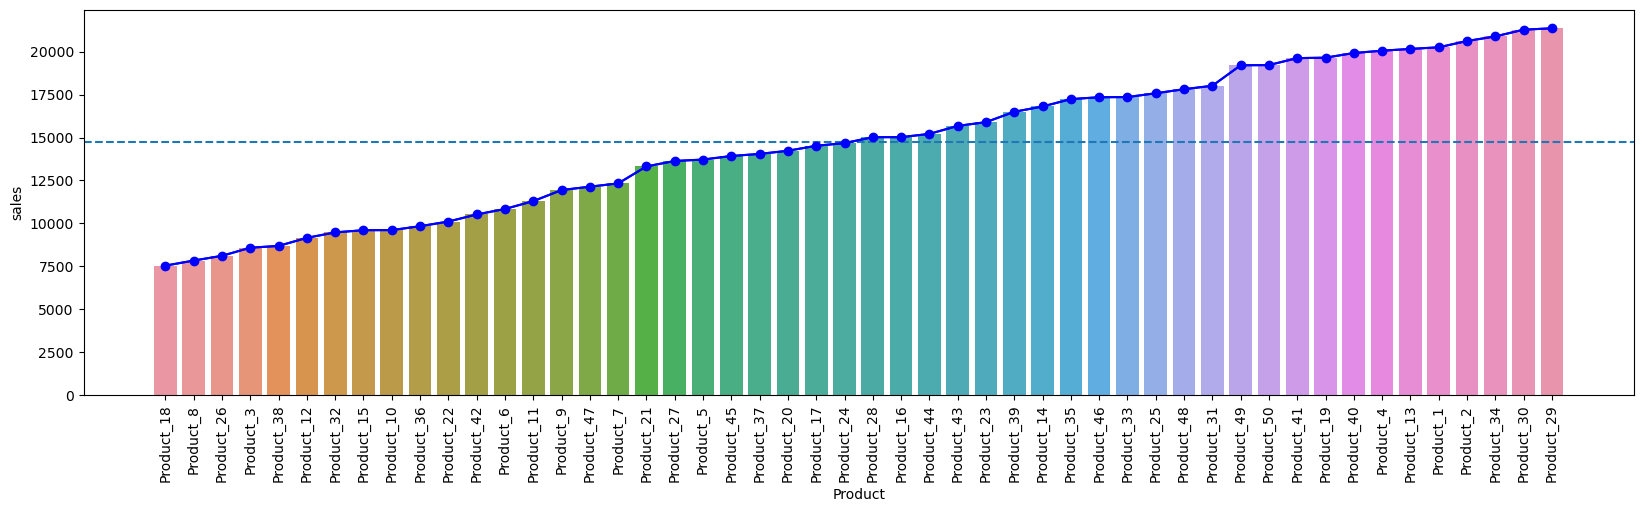

In [559]:
# recommendation : 
# 1) identify the product to improve or drop (based on sales)

# isolating each graph based on Product

dfp = df.groupby('Product')['sales'].sum().reset_index()



# to sort the region
dfp.sort_values('sales', axis=0, ascending=True, inplace=True)

# dropping 'Other' that we added to fillin the missing details for using price and units. 
# reason: too many missing product information
dfp = dfp[dfp['Product'] != 'Other']

# plotting a grapgh to identify proicducts that can be improved
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfp, x='Product', y='sales')
plt.axhline(y=dfp['sales'].mean(), linestyle='--', label='Mean Sales Volume')
plt.plot(range(len(dfp)), dfp['sales'], marker='o', linestyle='-', color='b', label='Sales Trend')
plt.plot(range(len(dfp)), dfp['sales'], color='b')
# sns.barplot(x='Weekday', y='Units', data=weekday_sales)


From the above we can recommend to concentrate the sales on Product -1,2,34,30,29

re-evaluate the low sales volue products - 18,8,26,3,38

these recommendations are based on analsysi and needs to consider if the prodcut is newly launched and has lows sales deatils added in the analysis.  If the future sales volume is expected to increase in this region then this recomentation wont be valid. we should also lkook at introducing new products which have higher price since the relation of proiice and sales are co-related

***We can reallocate resources from Product 1,2,34,30,29 to conentrate on 18,8,26,3,38***


C:\Users\srika\AppData\Local\Temp\ipykernel_19028\2468856113.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


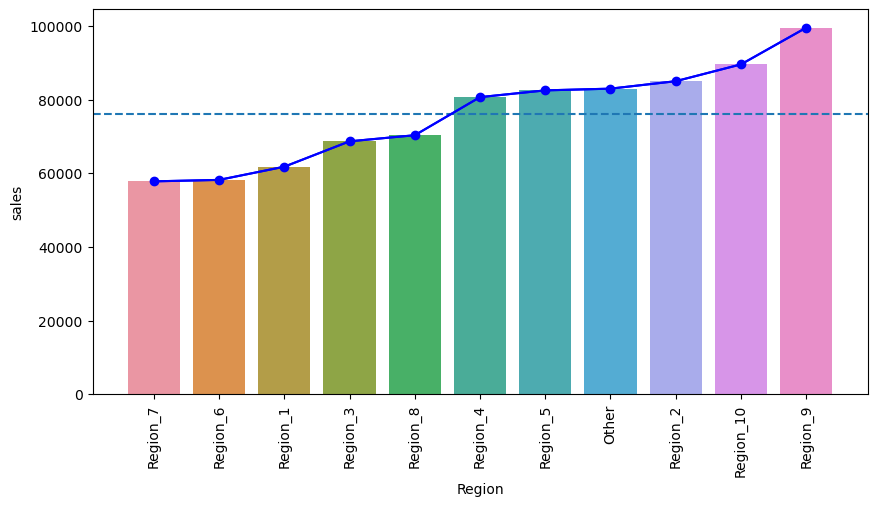

In [560]:
# recommendation : 
# 2) identify the region to improve or drop (based on sales)

# isolating each graph based on region 
dfr = df.groupby('Region')['sales'].sum().reset_index()

# to sort the region
dfr.sort_values('sales', axis=0, ascending=True, inplace=True)

# dropping 'Other' that we added to fillin the missing details for using price and units. 
# reason: too many missing Region information
# dfr = dfr[dfr['Region'] != 'Other']


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfr, x='Region', y='sales')
plt.axhline(y=dfr['sales'].mean(), linestyle='--', label='Mean Sales Volume')
plt.plot(range(len(dfr)), dfr['sales'], marker='o', linestyle='-', color='b', label='Sales Trend')
plt.plot(range(len(dfr)), dfr['sales'], color='b')
# sns.barplot(x='Weekday', y='Units', data=weekday_sales)


From the above we can recommend to concentrate the sales in Regions -2 ,10, 9

re-evaluate the low sales region - 7,6,1 

these recommendations are based on Analysis and needs to consider if the prodcut is newly launched in that region and has lows sales deatils added in the analysis. If the future sales volume is expected to increase in this region then this recomentation wont be valid. we should also lkook at introducing new products which have higher price since the relation of proiice and sales are co-related


***We can reallocate resources from Region 7,6,1 to conentrate on 2,10,9***

<Axes: xlabel='Date'>

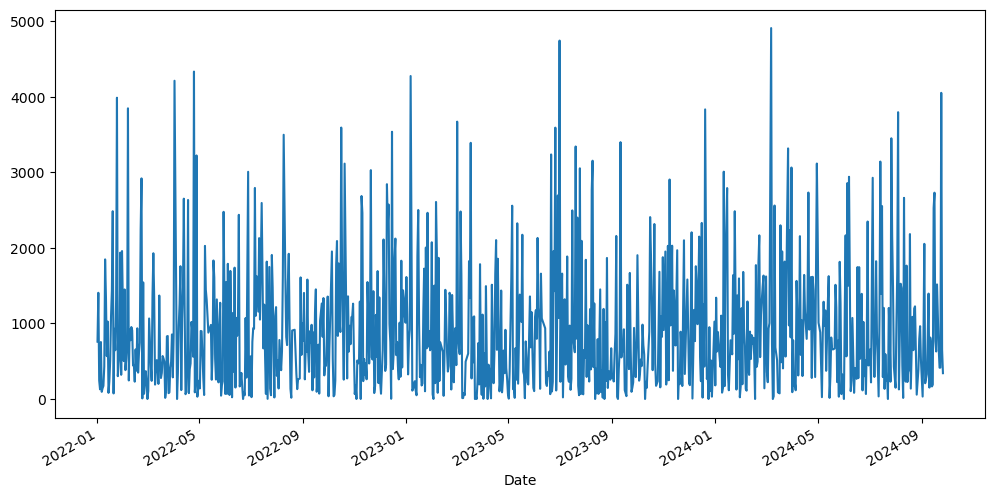

In [561]:
# Extract the year, month & season from the "Sale Date" column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.quarter

# Calculate sales per month
sales_product = df.groupby(['Date'])['sales'].sum()
sales_product.plot(kind='line', figsize=(12, 6))
# sns.barplot(x='Weekday', y='Units', data=weekday_sales)

the sales seems to be cyclic.we can pitch in with new product as per season.

<Axes: xlabel='Season'>

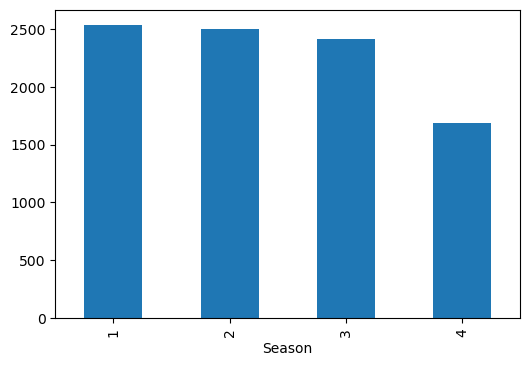

In [562]:
# Calculate total sales volume per season
seasonal_sales = df.groupby('Season')['Units'].sum()

# Plot the seasonal sales analysis
seasonal_sales.plot(kind='bar', figsize=(6, 4))
# sns.barplot(x='Weekday', y='Units', data=weekday_sales)

We can pitch in new prodcuts in december because first qtr has highest sales volume.

<Axes: xlabel='Weekday', ylabel='Units'>

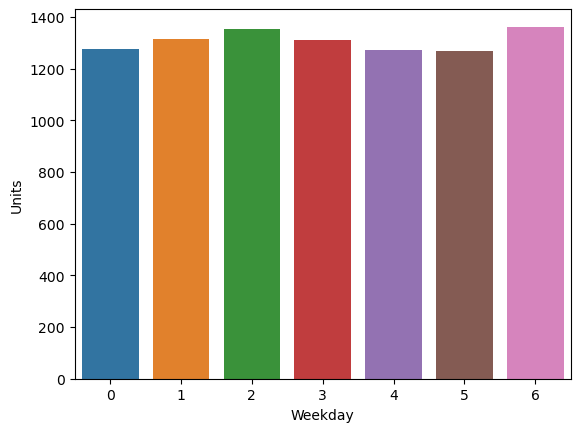

In [563]:
# Extract the weekday from the "Sale Date" column
df['Weekday'] = df['Date'].dt.weekday

# Calculate total sales volume per weekday
weekday_sales = df.groupby('Weekday')['Units'].sum().reset_index()

# Plot the sales by weekday analysis
# weekday_sales.plot(kind='bar', figsize=(10, 6))
sns.barplot(x='Weekday', y='Units', data=weekday_sales)


There is higher sales on tuesday & sunday. Hence we could provide discounts on friday and saturday to boost sales

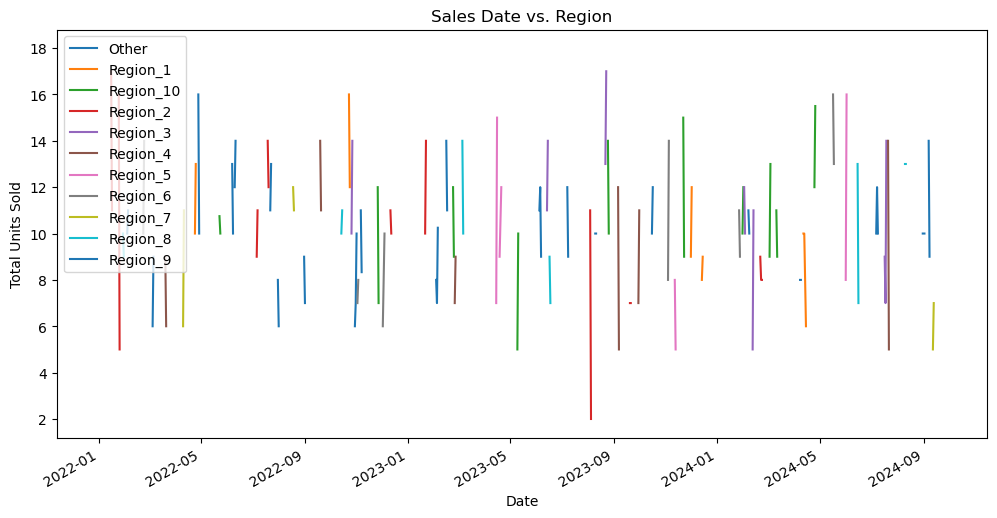

In [564]:
# Group the data by Sale Date and Region and calculate the total units sold
sales_region = df.groupby(['Date', 'Region'])['Units'].sum().unstack()

# Plot the line chart for each region
sales_region.plot(kind='line', figsize=(12, 6))
# sns.barplot(x='Weekday', y='Units', data=weekday_sales)
plt.show()

No pattern is observed

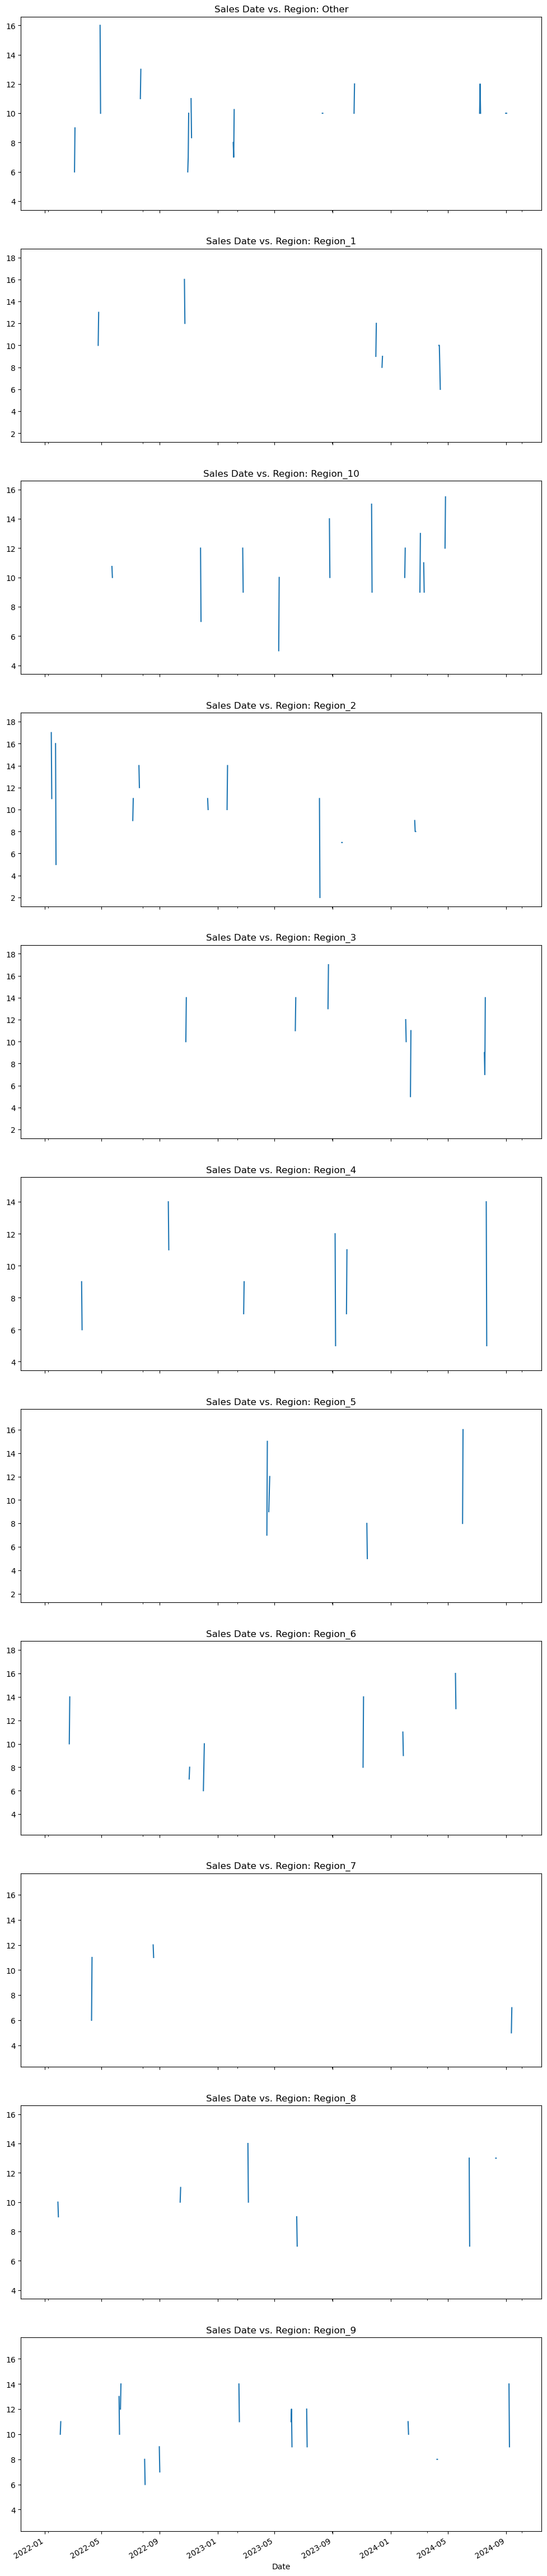

In [565]:

# Group the data by Sale Date and Region and calculate the total units sold
sales_region = df.groupby(['Date', 'Region'])['Units'].sum().unstack()

# Get a list of unique regions
regions = sales_region.columns

# Create subplots for each region
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 6 * len(regions)), sharex=True)

# Plot a line chart for each region
for i, region in enumerate(regions):
    sales_region[region].plot(kind='line', ax=axes[i])
    axes[i].set_title('Sales Date vs. Region: ' + region)


plt.show()

fromt he above region vs sales grapgh we can conclude :

1) new prodcut was introduced in region 7 after a long gap. hence we need to provide more time for familiarity

2) region 6 & 1 had product though out the time line but lacks sales vlomume. hence we need to comeup with new stratergy for sales.

3) region 5 has potential. since late tintroduction of products showed great sales.

4) region 2  had great avg sales.But has declined the the past few months and hence we need to look for introducing new product in this potential region

5) region 9 & 10 has been consistent

In [566]:

# removing Others for study of Region and Product
dfc =df.copy()

dfc = dfc[dfc['Product'] != 'Other']
dfc = dfc[dfc['Region'] != 'Other']



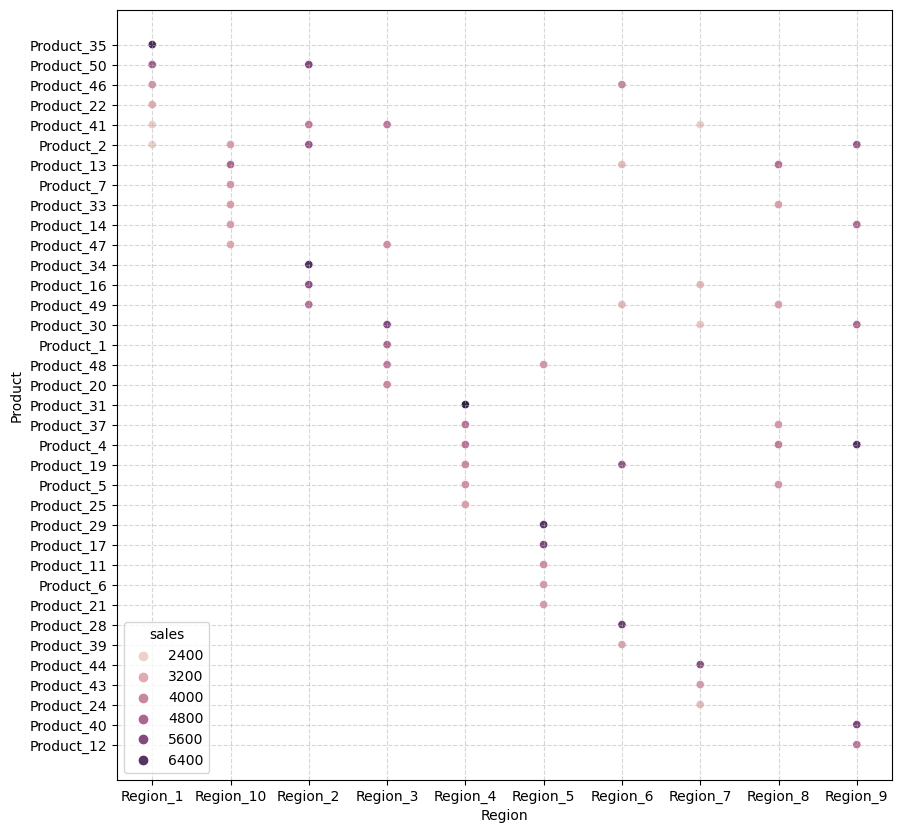

In [567]:

# Group the data by Product and Region and calculate the total units sold
sales_region_product = dfc.groupby(['Region', 'Product'])['sales'].sum().reset_index()
sales_region_product = sales_region_product.sort_values(by=list(sales_region_product.columns), ascending=True)
top_products_by_region = sales_region_product.groupby('Region').apply(lambda x: x.nlargest(6, 'sales')).reset_index(drop=True)
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=top_products_by_region, y='Product', x='Region', hue='sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

if few of the regions are removed considering region 7,6,1 with low sales

 we can recomment region specific high selling prodcut  to be removed as well.

 such as Product - 24,43,44,39,28,22,35


In [570]:
# Group the data by Product and Region and calculate the total units sold
sales_region_product_2 = dfc.groupby(['Region', 'Product'])['sales'].sum().reset_index()
sales_region_product_2 = sales_region_product_2.sort_values(by=list(sales_region_product_2.columns), ascending=True)
sales_region_product_2 = sales_region_product_2[sales_region_product_2['Product'].isin([24, 43, 44, 39, 28, 22, 35])]

sales_region_product_2

,Region,Product,sales


The prodcuts are unique to the region

In [569]:
df[(df['Units']<=3) & (df['sales']<=1000)]

,Product,Region,Price,Units,Date,sales,Year,Month,Season,Weekday
129,Product_33,Region_7,176.94,3.0,2022-05-20,530.82,2022,5,2,4
195,Product_6,Region_6,6.74,3.0,2022-07-29,20.22,2022,7,3,4
218,Product_13,Region_5,129.81,2.0,2022-08-26,259.62,2022,8,3,4
226,Other,Region_2,223.00,3.0,2022-09-04,669.00,2022,9,3,6
291,Product_5,Region_3,264.72,2.0,2022-11-12,529.44,2022,11,4,5
371,Product_10,Region_9,0.33,3.0,2023-02-02,0.99,2023,2,1,3
417,Product_3,Region_3,15.05,3.0,2023-03-24,45.15,2023,3,1,4
523,Product_33,Region_7,88.69,3.0,2023-07-15,266.07,2023,7,3,5
543,Product_5,Region_2,115.58,2.0,2023-08-05,231.16,2023,8,3,5
616,Product_31,Region_5,58.05,3.0,2023-10-23,174.15,2023,10,4,0


the above information states which products in which region should be dropped due to low Units sold & low sales income

---------------------------------------------------------------------------------

***step 6: Questions & Answers + Data Analysis results***

# 1) What conclusions can you draw about sales performance of various products and regions?
 I have divded the answer in three parts

 1) sales performance vs Product


 2) sales performance vs Region


 3) 




# 2) What recommendations do you have for the business?

we can reallocate resources from region 6 & 7 to concentrate on 9

We can reallocate resources from Product 22, 44, 18, 3, 36, 38 & 12 to conentrate on 26, 29, 50, 48, 30 & 31

we should also look at introducing new products which have higher price since the relation of price and sales are co-related

# 3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

for data cleaning we have applied the following process with reason:

1) removal of outliers - We need to removed them to for improving the sales over the mean. for example we removed price over 2000 because its a unique observation and could distort the grapgh for the rest.
    we have also removed some of outliers when plotted aginst Region where high no of units are sold. in this case we are considering it like a one-off event like a birthday party order,etc., which wont be repeated. or has lower prediction of repeatition. considering repeatition limited over the mean within thir quantile calcuated form standard deviation.it may also be a mistyped by checking if it is an double number typed.

2) removal of duplicated - we can have duplicate entry just to make sure the values are recorded. for any teo records having all the same values in all columns can be dropped.

3)filling missing values - soe of the usefull data might be missing a product name or a region name. inclusing them in others provides us with more usefull data taking unique values. for the Price & units we cn fill it with either '0', or mean or median. it depends on how it effects the data on the whole. in out case giving it a '0' or a median has distorted the graph and using a median 



